### Import de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ejemplo de Kmeans en la documentacion Web de Sklearn

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
#parametros para Kmeans : el numero de clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

### Ejemplo 2 : estadisticas sobre clientes de un Mall

### Import del data

In [5]:
df = pd.read_csv("datasets/Mall_Customers.csv" , index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
##renombrar las columnas del csv
df.rename(columns={'Annual Income (k$)' : 'Income' , 'Spending Score (1-100)':'Spending_score'}, inplace=True)
df.head()

,Gender,Age,Income,Spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


### Descripcion de las estadisticas 

In [7]:
df.describe()

,Age,Income,Spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


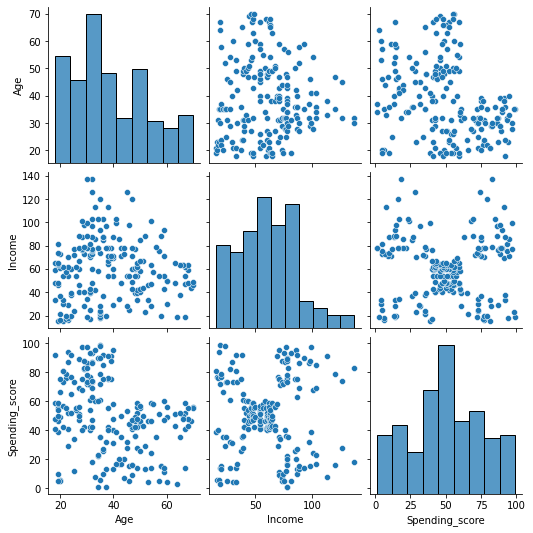

In [8]:
#los datos que queremos utilizar son edad , sueldo y su puntuacion de compras
sns.pairplot(df[['Age','Income','Spending_score']])

### kmeans con 5 clusters

In [9]:
import sklearn.cluster as cluster

In [11]:
#usamos 2 variables
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(df[['Spending_score','Income']])

In [12]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

### adjuntar clusters a los datos originales


In [13]:
df['Clusters'] = kmeans.labels_

In [14]:
df.head()

,Gender,Age,Income,Spending_score,Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,4
3,Female,20,16,6,3
4,Female,23,16,77,4
5,Female,31,17,40,3


In [19]:
df['Clusters'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: Clusters, dtype: int64

### graficar los datos con clusters

<AxesSubplot:xlabel='Spending_score', ylabel='Income'>

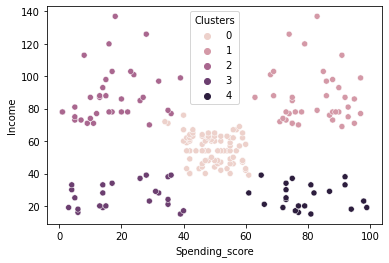

In [20]:
sns.scatterplot(x="Spending_score" , y = "Income", hue= 'Clusters', data=df)

### Ejemplo 3 : Csv de Pokemon

In [43]:
pokemon = pd.read_csv("datasets/pokemon.csv" , index_col='Name')
pokemon.head()


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [44]:
pokemon.drop(['Legendary','#','Type 1','Type 2','Total'],axis=1,inplace=True)
pokemon.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Name,,,,,,,
Bulbasaur,45,49,49,65,65,45,1
Ivysaur,60,62,63,80,80,60,1
Venusaur,80,82,83,100,100,80,1
VenusaurMega Venusaur,80,100,123,122,120,80,1
Charmander,39,52,43,60,50,65,1


### Descripcion de las estadisticas

In [45]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


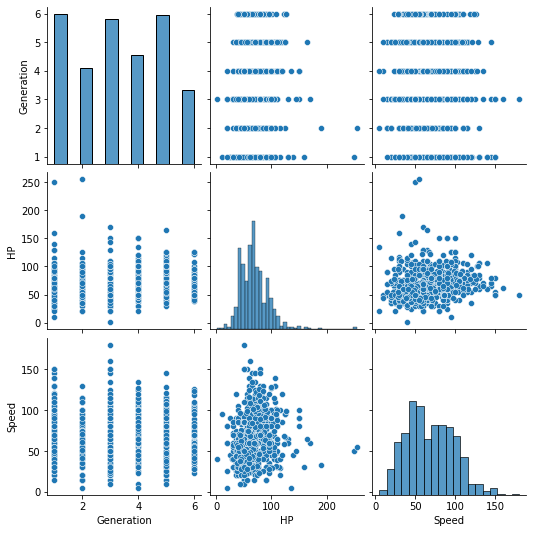

In [47]:
#los datos que se usaran son hp , ataque y la defensa
sns.pairplot(pokemon[['Generation','HP','Speed']])

In [48]:
#usamos 2 variables
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(pokemon[['HP','Speed']])
kmeans.cluster_centers_


array([[ 78.08796296, 104.4212963 ],
       [ 89.29411765,  56.35947712],
       [ 52.60891089,  36.03465347],
       [ 51.6372549 ,  70.91176471],
       [148.68      ,  67.96      ]])

### adjuntamos los datos de los clusters a los datos originales

In [49]:
pokemon['Clusters'] = kmeans.labels_

In [50]:
pokemon.head()
#recordar que solo se estan usando las variables ataque y defensa para los clusters

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Bulbasaur,45,49,49,65,65,45,1,2
Ivysaur,60,62,63,80,80,60,1,3
Venusaur,80,82,83,100,100,80,1,0
VenusaurMega Venusaur,80,100,123,122,120,80,1,0
Charmander,39,52,43,60,50,65,1,3


In [51]:
pokemon['Clusters'].value_counts()

0    216
3    204
2    202
1    153
4     25
Name: Clusters, dtype: int64

### Graficar los datos con clusters

<AxesSubplot:xlabel='HP', ylabel='Defense'>

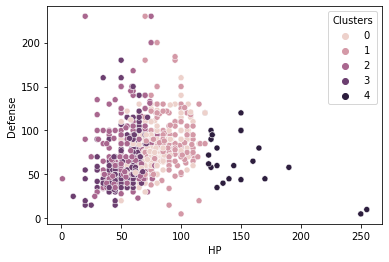

In [63]:
sns.scatterplot(x="HP" , y = "Defense", hue= 'Clusters', data=pokemon)

### Clasificacion por clusters

In [56]:
pokemon[pokemon['Clusters']==0].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Venusaur,80,82,83,100,100,80,1,0
VenusaurMega Venusaur,80,100,123,122,120,80,1,0
Charizard,78,84,78,109,85,100,1,0
CharizardMega Charizard X,78,130,111,130,85,100,1,0
CharizardMega Charizard Y,78,104,78,159,115,100,1,0


In [58]:
pokemon[pokemon['Clusters']==1].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Blastoise,79,83,100,85,105,78,1,1
BlastoiseMega Blastoise,79,103,120,135,115,78,1,1
Sandslash,75,100,110,45,55,65,1,1
Nidorina,70,62,67,55,55,56,1,1
Nidoqueen,90,92,87,75,85,76,1,1


In [57]:
pokemon[pokemon['Clusters']==2].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Bulbasaur,45,49,49,65,65,45,1,2
Squirtle,44,48,65,50,64,43,1,2
Caterpie,45,30,35,20,20,45,1,2
Metapod,50,20,55,25,25,30,1,2
Weedle,40,35,30,20,20,50,1,2


In [59]:
pokemon[pokemon['Clusters']==3].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Clusters
Name,,,,,,,,
Ivysaur,60,62,63,80,80,60,1,3
Charmander,39,52,43,60,50,65,1,3
Charmeleon,58,64,58,80,65,80,1,3
Wartortle,59,63,80,65,80,58,1,3
Butterfree,60,45,50,90,80,70,1,3


In [42]:
pokemon[pokemon['Clusters']==4].head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Clusters
Name,,,,,,,
VenusaurMega Venusaur,80,100,123,122,120,80,4
BlastoiseMega Blastoise,79,103,120,135,115,78,4
Sandslash,75,100,110,45,55,65,4
Graveler,55,95,115,45,45,35,4
Golem,80,120,130,55,65,45,4
